# Generate dataset

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a dataset with 1000 samples, 4 classes, and 3 features
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, n_clusters_per_class=1, random_state=14)

Plotting

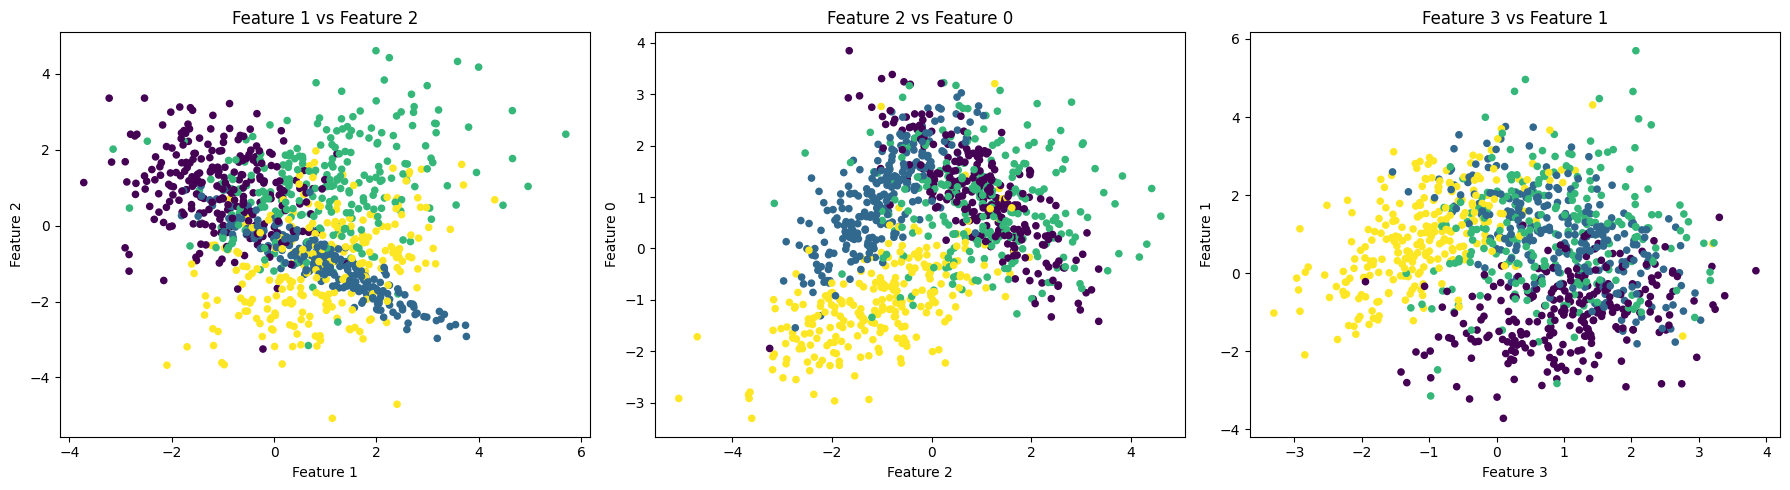

In [ ]:
# Visualize the dataset
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    # Pick one feature as x and another as y for plotting, skipping the diagonal
    axs[i].scatter(X[:, i], X[:, (i+1)%3], c=y, cmap='viridis', s=20)
    axs[i].set_title(f'Feature {i+1} vs Feature {(i+2)%3}')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel(f'Feature {(i+2)%3}')

plt.tight_layout()
plt.show()

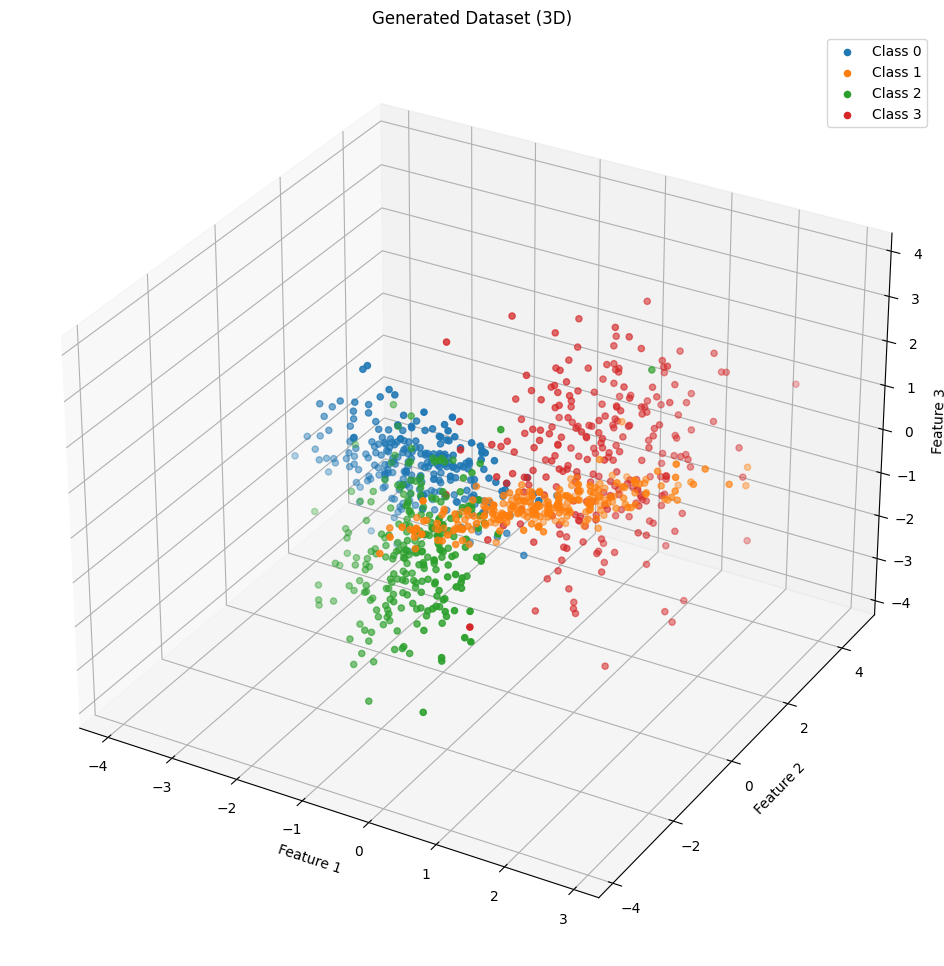

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizing the dataset in 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(X[y == i][:, 0], X[y == i][:, 1], X[y == i][:, 2], label=f'Class {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Generated Dataset (3D)')
ax.legend()
plt.show()


## Generate a more complex dataset with 1000 samples, 4 classes, and 3 features

In [ ]:
X_2, y_2 = make_classification(n_samples=1000, n_features=3, n_classes=4, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.05, class_sep=0.5, random_state=14)

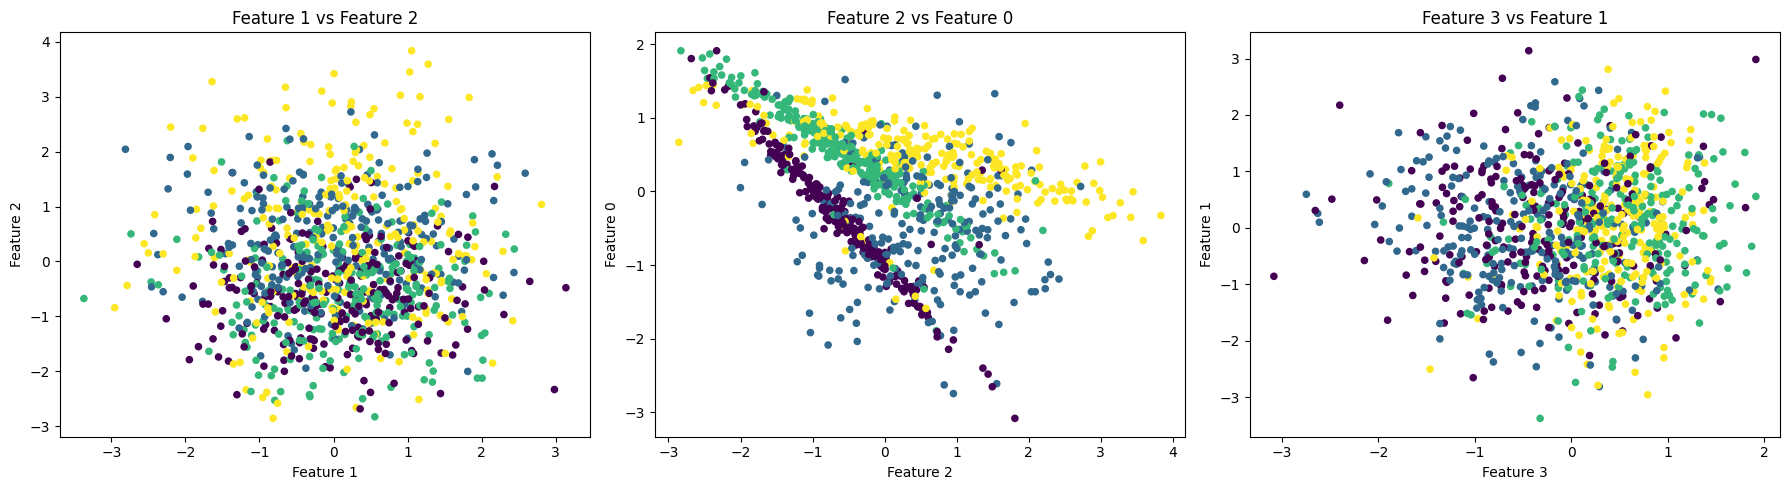

In [ ]:
# Visualize the dataset
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    # Pick one feature as x and another as y for plotting, skipping the diagonal
    axs[i].scatter(X_2[:, i], X_2[:, (i+1)%3], c=y_2, cmap='viridis', s=20)
    axs[i].set_title(f'Feature {i+1} vs Feature {(i+2)%3}')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel(f'Feature {(i+2)%3}')

plt.tight_layout()
plt.show()

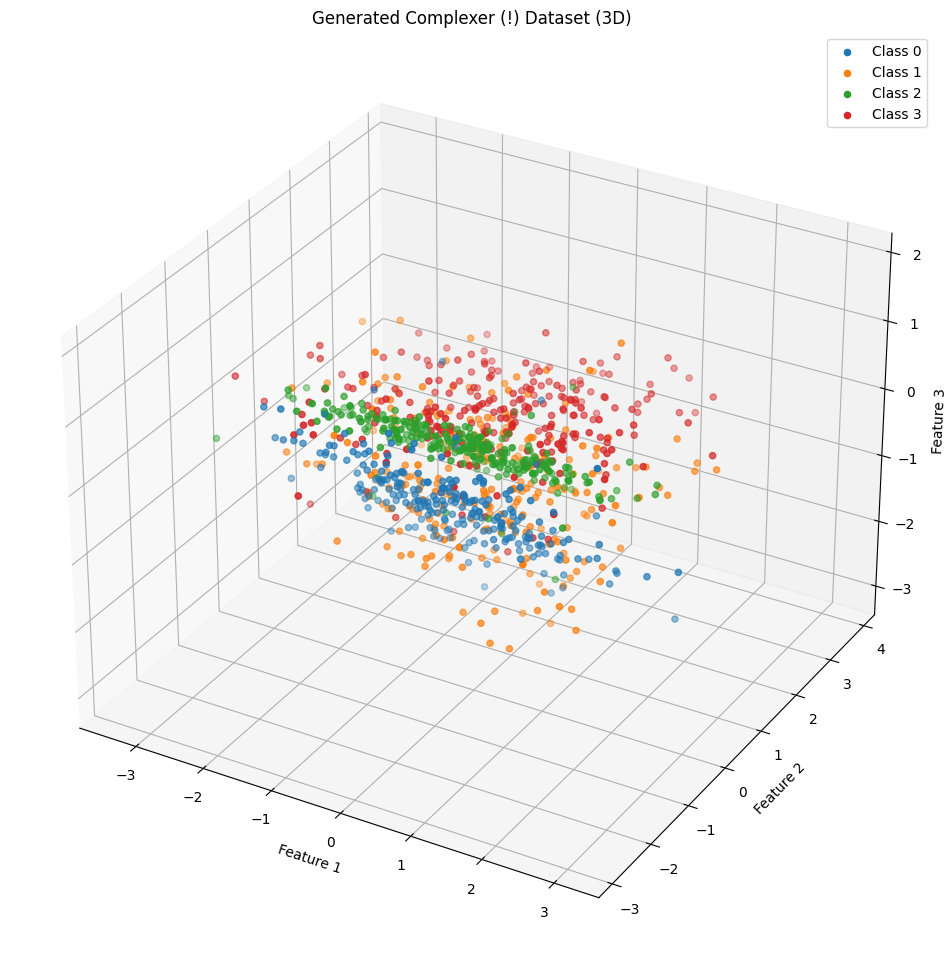

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizing the dataset in 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(X_2[y_2 == i][:, 0], X_2[y_2 == i][:, 1], X_2[y_2 == i][:, 2], label=f'Class {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Generated Complexer (!) Dataset (3D)')
ax.legend()
plt.show()


# Classifiers

In [13]:
def plot_decision_boundaries(X, y, classifier, feature_indices=(0, 1)):
    # Fit model to the specified features
    classifier.fit(X[:, feature_indices], y)

    # Define meshgrid for the background colors
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict on mesh to get the decision boundaries
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict on the original data points to find misclassifications
    y_pred = classifier.predict(X[:, feature_indices])
    misclassified = y != y_pred

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, feature_indices[0]][~misclassified], X[:, feature_indices[1]][~misclassified], c=y[~misclassified], s=20, label='Correctly Classified')
    plt.scatter(X[:, feature_indices[0]][misclassified], X[:, feature_indices[1]][misclassified], c=y[misclassified], s=30, marker='x', label='Misclassified')
    plt.xlabel(f'Feature {feature_indices[0]+1}')
    plt.ylabel(f'Feature {feature_indices[1]+1}')
    plt.title('Decision Boundary with Misclassifications (x)')
    plt.legend()

The dataset classify results: 
Log regression accuracy: 0.745
SGD accuracy: 0.745


[Text(0, 0.5, 'Class 0'),
 Text(0, 1.5, 'Class 1'),
 Text(0, 2.5, 'Class 2'),
 Text(0, 3.5, 'Class 3')]

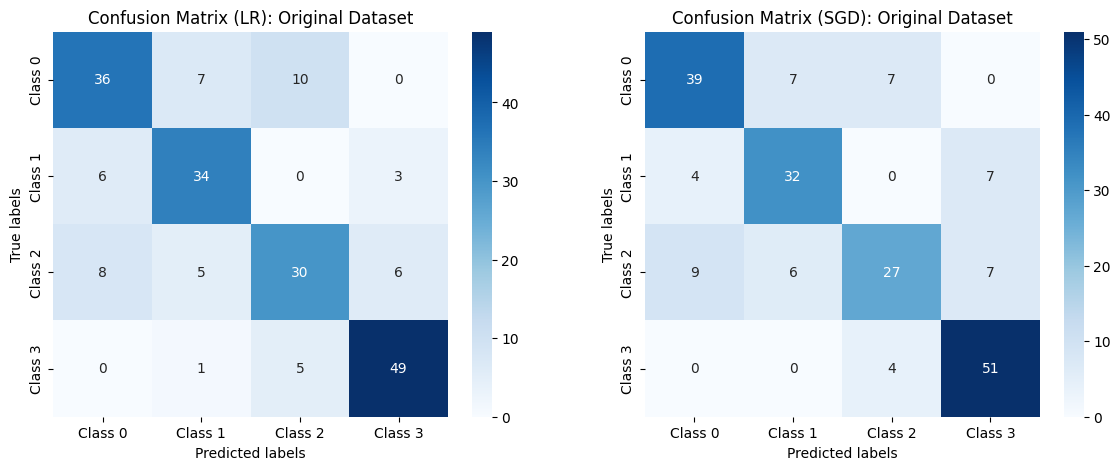

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Split both datasets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Initialize classifiers with base parameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000, C=1, random_state=14)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, loss='modified_huber', alpha=0.001, random_state=14)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
# Train SGDClassifier
sgd_clf.fit(X_train, y_train)


# Evaluate the models
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf.predict(X_test))
print('The dataset classify results: ')
print(f'Log regression accuracy: {log_reg_accuracy}')
print(f'SGD accuracy: {sgd_clf_accuracy}')

# Confusion matrices
cm_reg = confusion_matrix(y_test, log_reg.predict(X_test))

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (LR): Original Dataset')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[0].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

cm_sgd = confusion_matrix(y_test, sgd_clf.predict(X_test))

sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (SGD): Original Dataset')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[1].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

Decision boundries for LR

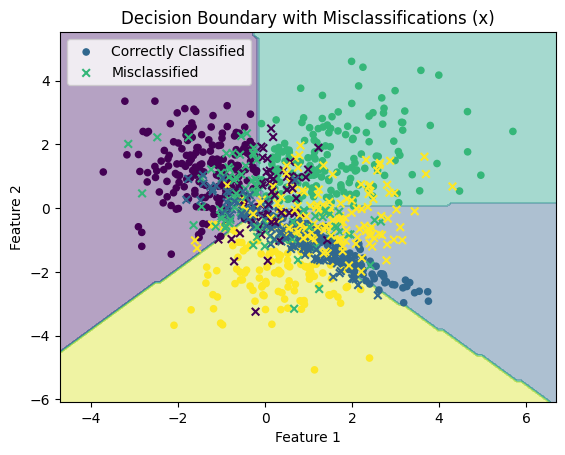

In [ ]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X, y, log_reg, (0, 1))

Decision boundries for SGD

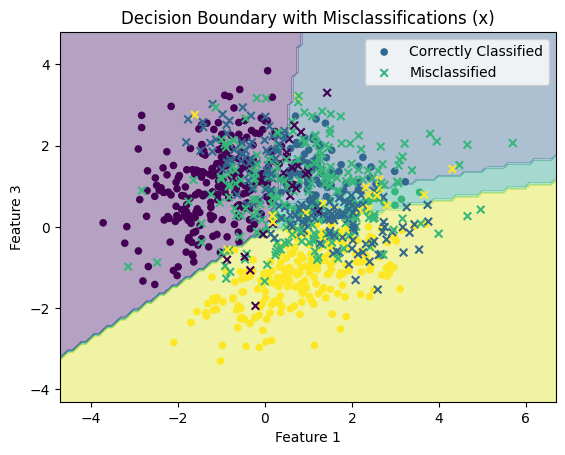

In [ ]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X, y, sgd_clf, (0, 2))

complex dataset

The complex dataset classify results: 
Log regression accuracy: 0.69
SGD accuracy: 0.63


[Text(0, 0.5, 'Class 0'),
 Text(0, 1.5, 'Class 1'),
 Text(0, 2.5, 'Class 2'),
 Text(0, 3.5, 'Class 3')]

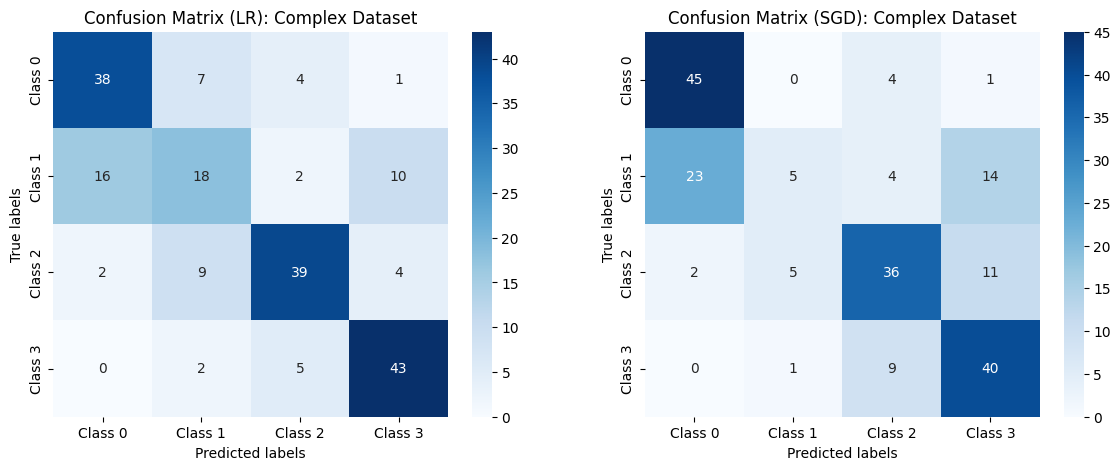

In [ ]:
X_complex_train, X_complex_test, y_complex_train, y_complex_test = train_test_split(X_2, y_2, test_size=0.2, random_state=14)

log_reg_complex = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000, C=1, random_state=14)
log_reg_complex.fit(X_complex_train, y_complex_train)

sgd_clf_complex = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001, loss='modified_huber', random_state=14)
sgd_clf_complex.fit(X_complex_train, y_complex_train)

# Evaluate the models
log_reg_complex_accuracy = accuracy_score(y_complex_test, log_reg_complex.predict(X_complex_test))
sgd_clf_complex_accuracy = accuracy_score(y_complex_test, sgd_clf_complex.predict(X_complex_test))
print('The complex dataset classify results: ')
print(f'Log regression accuracy: {log_reg_complex_accuracy}')
print(f'SGD accuracy: {sgd_clf_complex_accuracy}')

# Confusion matrices
cm_reg = confusion_matrix(y_complex_test, log_reg_complex.predict(X_complex_test))

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (LR): Complex Dataset')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[0].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

cm_sgd = confusion_matrix(y_complex_test, sgd_clf_complex.predict(X_complex_test))

sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (SGD): Complex Dataset')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[1].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

Decision boundries for LR

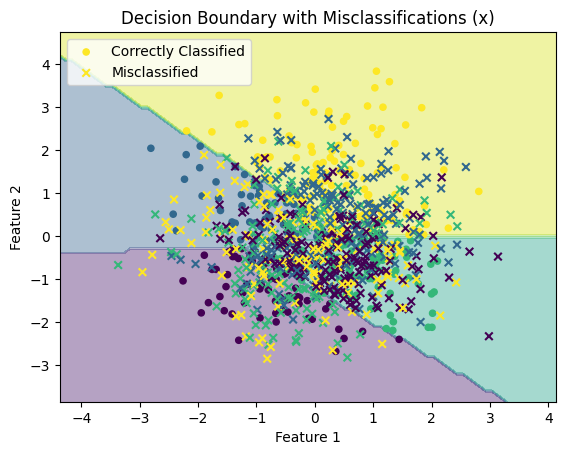

In [ ]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X_2, y_2, log_reg_complex, (0, 1))

Decision boundries for SGD

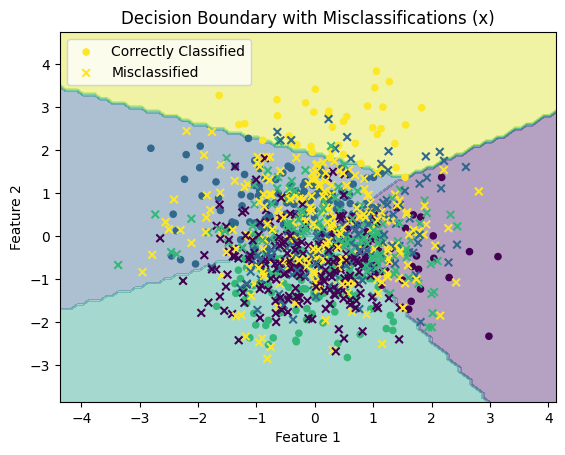

In [ ]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X_2, y_2, sgd_clf_complex, (0, 1))

## Applying improvements on the complex data

The complex dataset classify with improvements results: 
Log regression accuracy: 0.685
SGD accuracy: 0.65


[Text(0, 0.5, 'Class 0'),
 Text(0, 1.5, 'Class 1'),
 Text(0, 2.5, 'Class 2'),
 Text(0, 3.5, 'Class 3')]

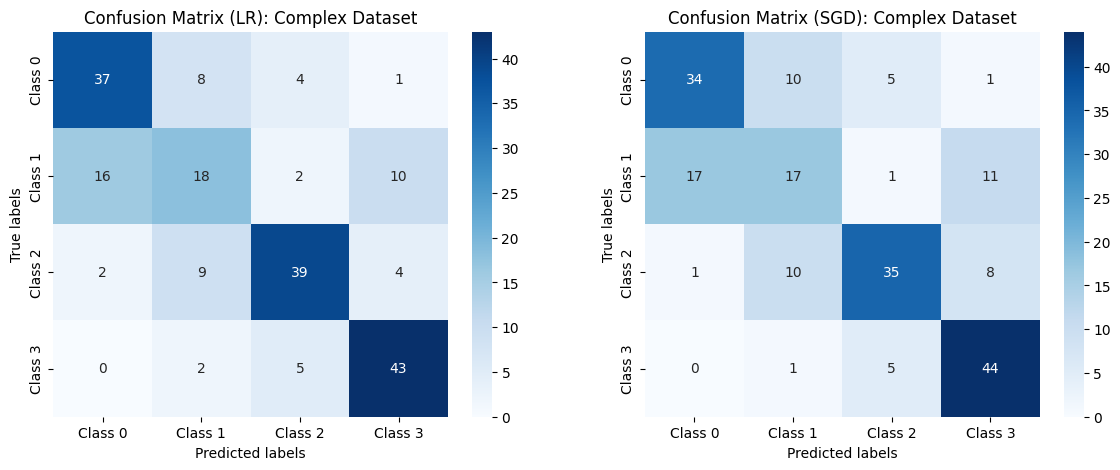

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipelines for both models with StandardScaler for feature scaling
log_reg_pipeline_complex = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='newton-cg', C=0.5, max_iter=10000, random_state=14))
sgd_clf_pipeline_complex = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-4, alpha=0.01, random_state=14))

# Train the models on the complex dataset
log_reg_pipeline_complex.fit(X_complex_train, y_complex_train)
sgd_clf_pipeline_complex.fit(X_complex_train, y_complex_train)

# Evaluate the models
log_reg_complex_accuracy_improved = accuracy_score(y_complex_test, log_reg_pipeline_complex.predict(X_complex_test))
sgd_clf_complex_accuracy_improved = accuracy_score(y_complex_test, sgd_clf_pipeline_complex.predict(X_complex_test))

print('The complex dataset classify with improvements results: ')
print(f'Log regression accuracy: {log_reg_complex_accuracy_improved}')
print(f'SGD accuracy: {sgd_clf_complex_accuracy_improved}')

# Confusion matrices
cm_reg = confusion_matrix(y_complex_test, log_reg_pipeline_complex.predict(X_complex_test))

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (LR): Complex Dataset')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[0].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

cm_sgd = confusion_matrix(y_complex_test, sgd_clf_pipeline_complex.predict(X_complex_test))

sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (SGD): Complex Dataset')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[1].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# DrawData

In [ ]:
!pip install drawdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [6]:
# Get the drawn data as a dataframe
df= widget.data_as_pandas

In [7]:
df.head()

,x,y,color,label
0,111.273433,366.308391,#1f77b4,a
1,34.835789,374.996108,#1f77b4,a
2,116.913070,366.969781,#1f77b4,a
3,85.634075,397.692412,#1f77b4,a
4,88.044181,454.207093,#1f77b4,a


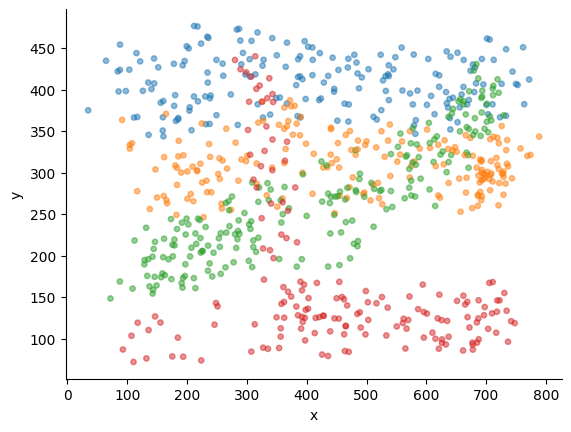

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x', y='y', s=15, alpha=.5, c='color')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
from sklearn.preprocessing import LabelEncoder

X = df[['x', 'y']].values  # Features

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label']) # Labels as categorical

The dataset classify results: 
Log regression accuracy: 0.64
SGD accuracy: 0.26666666666666666


[Text(0, 0.5, 'Class 0'),
 Text(0, 1.5, 'Class 1'),
 Text(0, 2.5, 'Class 2'),
 Text(0, 3.5, 'Class 3')]

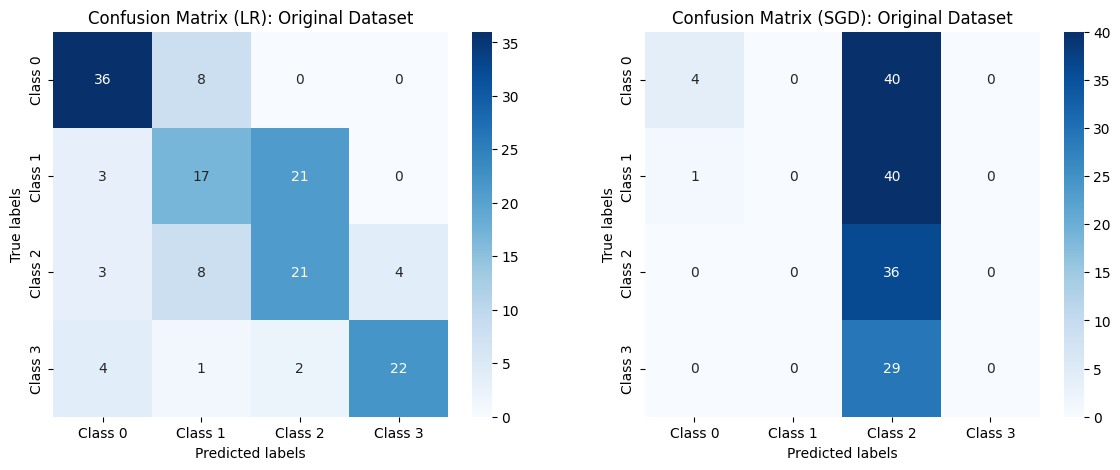

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)

# Split both datasets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Initialize classifiers with base parameters
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=10000, C=0.5, tol=1e-4, random_state=14)
sgd_clf = SGDClassifier(loss='log_loss',max_iter=1000, tol=1e-5, alpha=1e-6, random_state=14)


# Train Logistic Regression
log_reg.fit(X_train, y_train)
# Train SGDClassifier
sgd_clf.fit(X_train, y_train)


# Evaluate the models
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf.predict(X_test))
print('The dataset classify results: ')
print(f'Log regression accuracy: {log_reg_accuracy}')
print(f'SGD accuracy: {sgd_clf_accuracy}')

# Confusion matrices
cm_reg = confusion_matrix(y_test, log_reg.predict(X_test))

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (LR): Original Dataset')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[0].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

cm_sgd = confusion_matrix(y_test, sgd_clf.predict(X_test))

sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (SGD): Original Dataset')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])
ax[1].yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

Decision boundries for LR

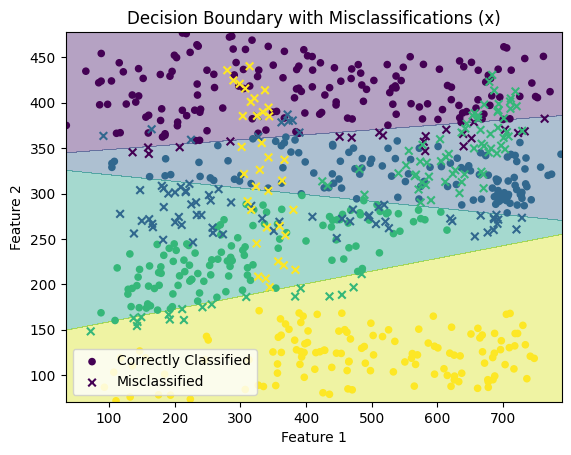

In [14]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X, y, log_reg)

Decision boundries for SGD

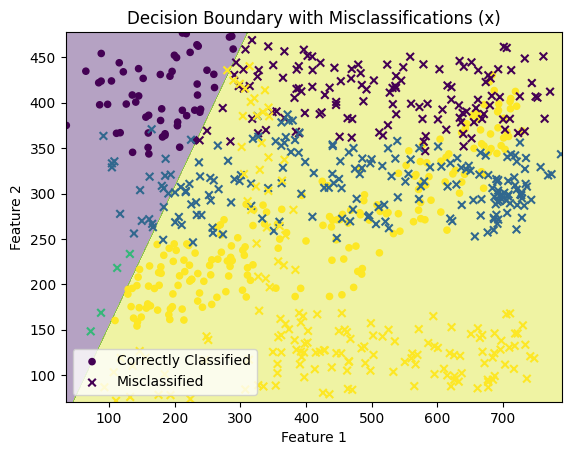

In [15]:
# Plot decision boundaries in 2D
plot_decision_boundaries(X, y, sgd_clf)